In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [144]:
d=pd.read_csv("Bengaluru_House_Data.csv")

In [145]:
d.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [146]:
d.shape

(13320, 9)

In [147]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [148]:
for column in d.columns:
    print(d[column].value_counts())
    print("*"*20)

area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
16-Oct               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom 

In [149]:
d.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [150]:
d.drop(columns=['area_type','society','balcony','availability'],inplace=True)

In [151]:
d.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [152]:
d.describe()
d.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [153]:
d['location'].value_counts()

location
Whitefield                 540
Sarjapur  Road             399
Electronic City            302
Kanakpura Road             273
Thanisandra                234
                          ... 
Park View Layout             1
Xavier Layout                1
Air View Colony              1
akshaya nagar t c palya      1
mvj engineering college      1
Name: count, Length: 1305, dtype: int64

In [154]:
d['location']=d['location'].fillna('Whitefield')

In [155]:
d.isna().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [156]:
d['size'].value_counts()

size
2 BHK         5199
3 BHK         4310
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
10 BHK           2
11 Bedroom       2
27 BHK           1
19 BHK           1
43 Bedroom       1
16 BHK           1
14 BHK           1
12 Bedroom       1
13 BHK           1
18 Bedroom       1
Name: count, dtype: int64

In [157]:
d['size']=d['size'].fillna('2 BHK')

In [158]:
d['bath'].value_counts()

bath
2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
11.0       3
13.0       3
16.0       2
27.0       1
14.0       1
40.0       1
15.0       1
18.0       1
Name: count, dtype: int64

In [159]:
d['bath'].mode()

0    2.0
Name: bath, dtype: float64

In [160]:
d['bath']=d['bath'].fillna(d['bath'].median())

In [161]:
d.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [162]:
d['BHK']=d['size'].str.split().str.get(0).astype(int)

In [163]:
d.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [164]:
d['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [165]:
def convert(x):
    try:
        temp = x.split('-')
        if len(temp) == 2:
            return (float(temp[0]) + float(temp[1])) / 2
        else:
            return float(x)
    except:
        return None


In [166]:
d['total_sqft']= d['total_sqft'].apply(convert)

In [167]:
d['price']=d['price']*100000

In [168]:
d['price']

0         3907000.0
1        12000000.0
2         6200000.0
3         9500000.0
4         5100000.0
            ...    
13315    23100000.0
13316    40000000.0
13317     6000000.0
13318    48800000.0
13319     1700000.0
Name: price, Length: 13320, dtype: float64

In [169]:
d['location']=d['location'].apply(lambda x:x.strip())

In [170]:
location_count=d['location'].value_counts()

In [171]:
loc_count_less10=location_count[location_count<=10]

In [172]:
loc_count_less10

location
Dodsworth Layout         10
Nagadevanahalli          10
Sadashiva Nagar          10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Hsr layout sector3        1
Thyagraj Nagar            1
Banagirinagar             1
Medaralli                 1
Chikkajala                1
Name: count, Length: 1053, dtype: int64

In [173]:
d['location']=d['location'].apply(lambda x:'other' if x in loc_count_less10 else x )

In [174]:
d['location'].value_counts()

location
other                        2885
Whitefield                    542
Sarjapur  Road                399
Electronic City               304
Kanakpura Road                273
                             ... 
Tindlu                         11
Marsur                         11
2nd Phase Judicial Layout      11
Thyagaraja Nagar               11
HAL 2nd Stage                  11
Name: count, Length: 242, dtype: int64

In [175]:
d['total_sqft'].describe()

count    13274.000000
mean      1559.626694
std       1238.405258
min          1.000000
25%       1100.000000
50%       1276.000000
75%       1680.000000
max      52272.000000
Name: total_sqft, dtype: float64

In [176]:
(d['total_sqft'] / d['BHK']).describe()


count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [177]:
d=d[((d['total_sqft'] / d['BHK'])>300)]

In [178]:
d.describe()

,total_sqft,bath,price,BHK
count,12348.000000,12348.000000,1.234800e+04,12348.000000
mean,1601.084689,2.542274,1.108232e+07,2.633301
std,1268.788019,1.065177,1.527944e+07,0.964402
min,340.000000,1.000000,8.440000e+05,1.000000
25%,1115.000000,2.000000,4.900000e+06,2.000000
50%,1305.000000,2.000000,6.947500e+06,3.000000
75%,1708.000000,3.000000,1.150000e+07,3.000000
max,52272.000000,16.000000,3.600000e+08,16.000000


In [179]:
d['price_per_sqft'] = d['price'] / d['total_sqft']

In [180]:

d.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,3907000.0,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,12000000.0,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,6200000.0,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,9500000.0,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,5100000.0,2,4250.000000


In [181]:
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        den_df = subdf[(subdf.price_per_sqft > (m - st)) & (subdf.price_per_sqft <= (m + st))]
        df_output = pd.concat([df_output, den_df], ignore_index=True)
    return df_output

d = remove_outliers_sqft(d)
d.describe()


,total_sqft,bath,price,BHK,price_per_sqft
count,10079.000000,10079.000000,1.007900e+04,10079.000000,10079.000000
mean,1509.254783,2.461653,9.097244e+06,2.562258,5626.018262
std,881.846858,0.965002,8.643193e+06,0.879000,2208.837162
min,350.000000,1.000000,1.000000e+06,1.000000,1250.000000
25%,1110.000000,2.000000,4.900000e+06,2.000000,4248.717576
50%,1290.000000,2.000000,6.700000e+06,2.000000,5166.666667
75%,1650.000000,3.000000,1.000000e+07,3.000000,6393.652258
max,30400.000000,16.000000,2.200000e+08,16.000000,24509.803922


In [182]:
def bhk_outlier_remove(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['price_per_sqft']),
                'std': np.std(bhk_df['price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft'] < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index').reset_index(drop=True)

# Apply the function to your DataFrame
d = bhk_outlier_remove(d)
print(d.describe())


         total_sqft         bath         price          BHK  price_per_sqft
count   7206.000000  7206.000000  7.206000e+03  7206.000000     7206.000000
mean    1501.902887     2.439634  9.907903e+06     2.490702     6095.389601
std      867.090909     0.995566  9.348668e+06     0.907282     2344.978520
min      350.000000     1.000000  1.000000e+06     1.000000     1300.000000
25%     1100.000000     2.000000  5.000000e+06     2.000000     4615.384615
50%     1265.000000     2.000000  7.310000e+06     2.000000     5666.666667
75%     1682.000000     3.000000  1.120000e+07     3.000000     6857.142857
max    30000.000000    16.000000  2.200000e+08    16.000000    24509.803922


In [183]:
d=bhk_outlier_remove(d)

In [184]:
d.shape

(6627, 7)

In [185]:
d.drop(columns=['size','price_per_sqft'],inplace=True)

In [186]:
d.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2


In [187]:
d.to_csv("Cleaned_data.csv")

In [188]:
d.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2


In [189]:
X=d.drop(columns=['price'])
y=d['price']

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [191]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [192]:
print(X_train.shape)
print(y_train.shape)

(5301, 4)
(5301,)


# Applying Linear Regression

In [193]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough')

In [194]:
scaler = StandardScaler()

In [195]:
lr = LinearRegression()

In [196]:
pipe = make_pipeline(column_trans,scaler, lr)

In [197]:
pipe.fit(X_train,y_train)

c:\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [198]:
d.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,42800000.0,4
1,1st Block Jayanagar,1630.0,3.0,19400000.0,3
2,1st Block Jayanagar,1875.0,2.0,23500000.0,3
3,1st Block Jayanagar,1200.0,2.0,13000000.0,3
4,1st Block Jayanagar,1235.0,2.0,14800000.0,2


In [199]:
y_pred_lr = pipe.predict(X_test)

In [200]:
r2_score(y_test,y_pred_lr)

0.8225963254657903

In [201]:
lasso = Lasso()

In [202]:
pipe = make_pipeline(column_trans,scaler, lasso)

In [203]:
pipe.fit(X_train,y_train)

c:\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+16, tolerance: 4.181e+13
  model = cd_fast.enet_coordinate_descent(
c:\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [204]:
y_pred_lasso = pipe.predict(X_test)
r2_score(y_test,y_pred_lasso)

0.8225853110801521

In [205]:
ridge = Ridge()

In [206]:
pipe = make_pipeline(column_trans,scaler, ridge)

In [207]:
pipe.fit(X_train,y_train)

c:\Python311\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [208]:
y_pred_ridge = pipe.predict(X_test)
r2_score(y_test,y_pred_ridge)

0.8225130813506257

In [222]:
print("No Regularization: ", r2_score(y_test,y_pred_lr))
print("Lasso: ", r2_score(y_test,y_pred_lasso))
print("Ridge: ", r2_score(y_test,y_pred_ridge))

r2_lr=r2_score(y_test,y_pred_lr)
r2_lasso=r2_score(y_test,y_pred_lasso)
r2_ridge=r2_score(y_test,y_pred_ridge)




No Regularization:  0.8225963254657903
Lasso:  0.8225853110801521
Ridge:  0.8225130813506257


In [210]:
import pickle

In [211]:
pickle.dump(pipe, open('RidgeModel.pkl','wb'))

In [212]:
d.isna().sum()

location      0
total_sqft    0
bath          0
price         0
BHK           0
dtype: int64

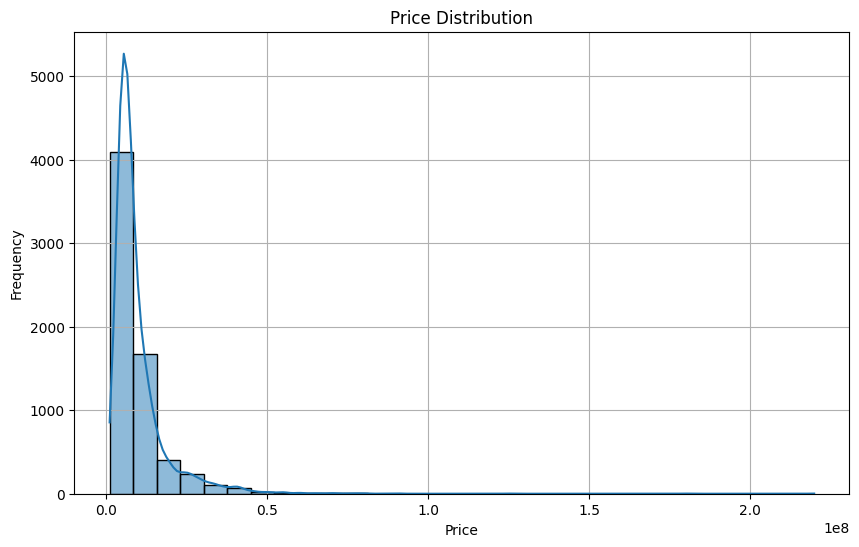

In [216]:
plt.figure(figsize=(10, 6))
sns.histplot(d['price'], kde=True, bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

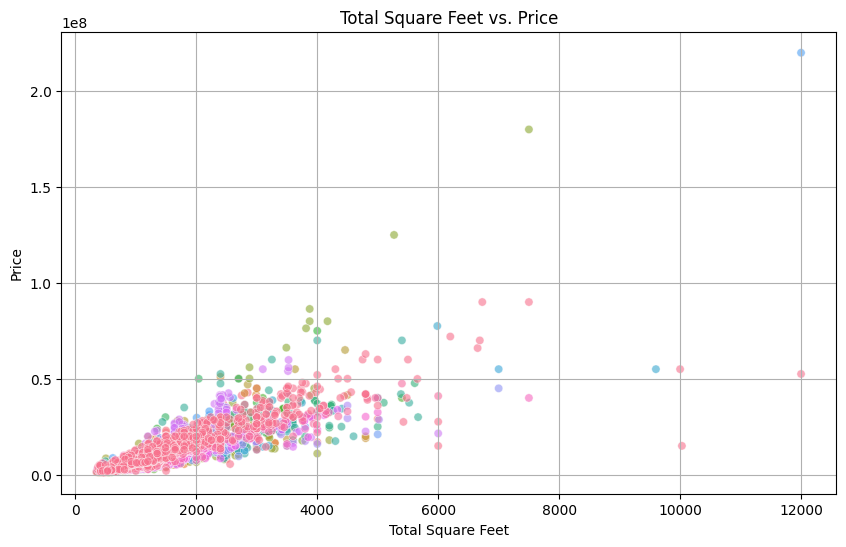

In [217]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_sqft', y='price', data=d, hue='location', legend=False, alpha=0.6)
plt.title('Total Square Feet vs. Price')
plt.xlabel('Total Square Feet')
plt.ylabel('Price')
plt.grid(True)
plt.show()

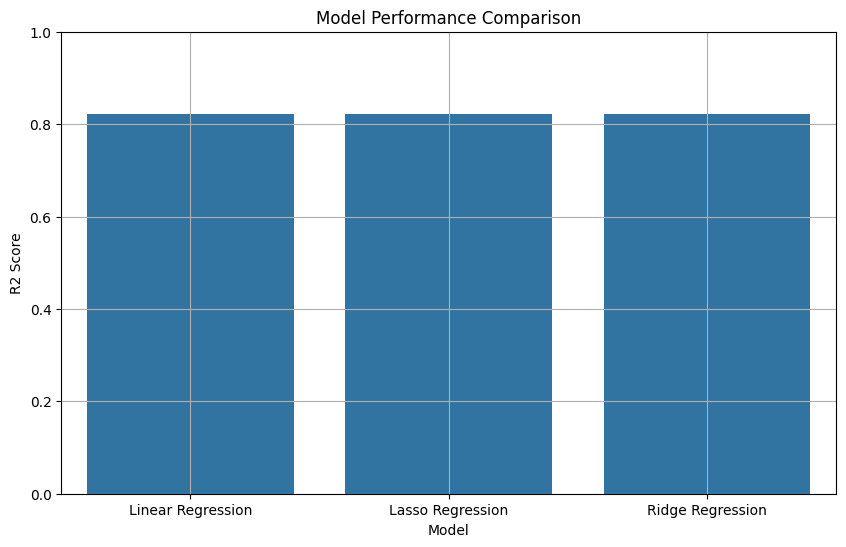

In [223]:
performance_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R2 Score': [r2_lr, r2_lasso, r2_ridge]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R2 Score', data=performance_data)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(True)
plt.show()


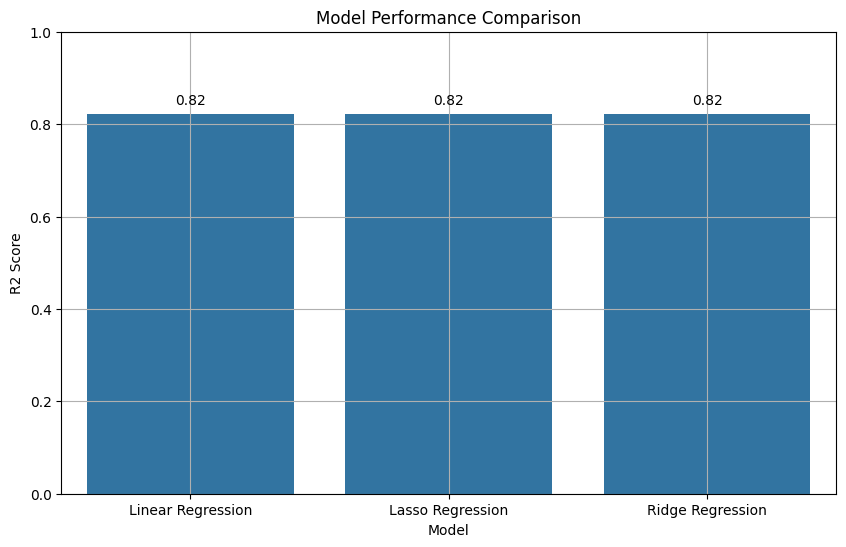

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample R² scores for demonstration purposes
r2_lr = 0.8225963254657903
r2_lasso = 0.8225853110801521
r2_ridge = 0.8225130813506257

# Create a DataFrame with model performance data
performance_data = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R2 Score': [r2_lr, r2_lasso, r2_ridge]
})

# Plot the bar chart
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='R2 Score', data=performance_data)
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.grid(True)

# Annotate the bars with the exact R² values
for index, row in performance_data.iterrows():
    bar_plot.text(index, row['R2 Score'] + 0.02, round(row['R2 Score'], 2), color='black', ha="center")

plt.show()
